#  A NON-UNIFORMLY SAMPLED SPARSE IMAGE

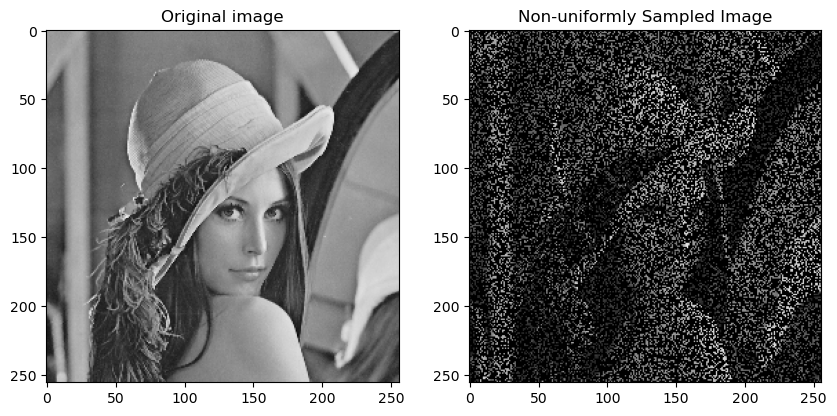

(256, 256)


In [5]:
import numpy as np
from skimage import io
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# Step 1: Acquire the image and binary matrix with 95% sparsity
sparsity = 0.7
input_image = io.imread(r"C:\Users\Let`s engineer\Downloads\8-bit-256-x-256-Grayscale-Lena-Image.png")
image_size = input_image.shape
binary_matrix = np.random.choice([0, 1], size=image_size, p=[sparsity, 1 - sparsity])

# Step 2: Multiply the image and binary matrix to get the sampled image
sampled_image = input_image * binary_matrix

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(input_image, cmap='gray'), plt.title('Original image')
plt.subplot(1, 2, 2), plt.imshow(sampled_image, cmap='gray'), plt.title('Non-uniformly Sampled Image')
plt.show()

print (image_size)

# DEFINING GAUSSIAN FILTER

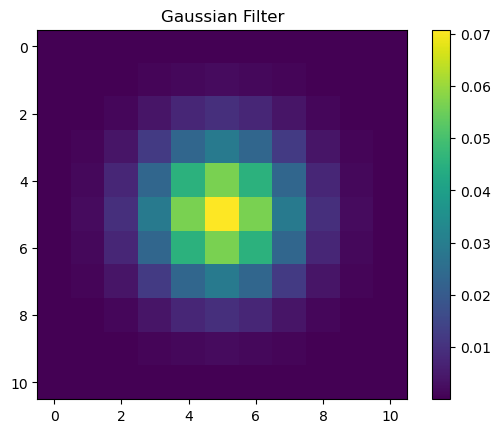

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Defining the filter

# Define the filter size (11x11)
filter_size = (11, 11)

# Define the standard deviation (sigma) for the Gaussian distribution
sigma = 1.5  # You can adjust this value as needed

# Create a grid of coordinates centered at (0, 0)
x, y = np.meshgrid(np.linspace(-5, 5, 11), np.linspace(-5, 5, 11))

# Compute the Gaussian filter values based on the 2D Gaussian formula
gaussian_filter_2d = (1 / ((2 * np.pi)**0.5 * (sigma**2))) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

# Normalize the filter to ensure the sum of elements is 1
gaussian_filter_2d /= np.sum(gaussian_filter_2d)

# Print the Gaussian filter
#print("2D Gaussian Filter:")
#print(gaussian_filter_2d)

# Show the Gaussian filter with a color map
plt.imshow(gaussian_filter_2d, cmap='viridis'), plt.title ("Gaussian Filter")  # You can choose a different colormap here
plt.colorbar()  # Add a colorbar to show the colormap
plt.show()


# GETTING THE RECONSTRUCTED IMAGE AT THE FIRST LEVEL

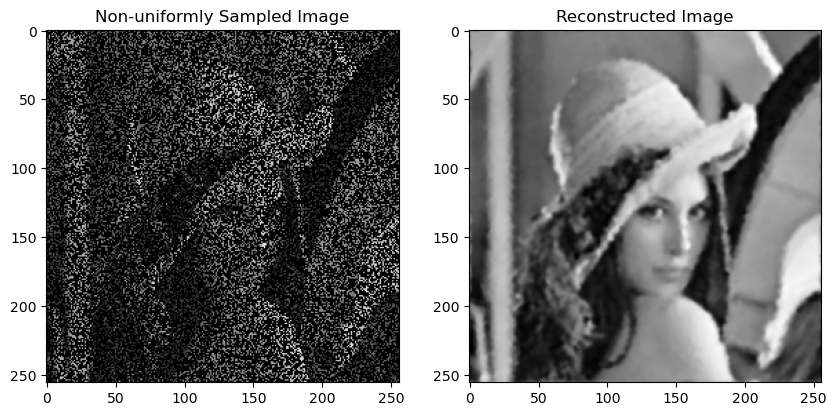

In [7]:
# Step 4: Convolve sampled image and filter to get C(x, y)
convolved_image = convolve2d(sampled_image, gaussian_filter_2d, mode='same', boundary='wrap')

# Step 5: Convolve binary matrix and filter to get NC(x, y)
convolved_binary_matrix = convolve2d(binary_matrix, gaussian_filter_2d, mode='same', boundary='wrap')

# Step 6: Perform the element-wise division to get f_tilda
f_tilda = convolved_image / (convolved_binary_matrix + 1e-6)  # Avoid division by zero

# Step 7: Show the reconstructed image

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(sampled_image, cmap='gray'), plt.title('Non-uniformly Sampled Image')
plt.subplot(1, 2, 2), plt.imshow(f_tilda, cmap='gray'), plt.title('Reconstructed Image')
plt.show()

# TAKING THE GRADIENT OF THE RECONSTRUCTED IMAGE

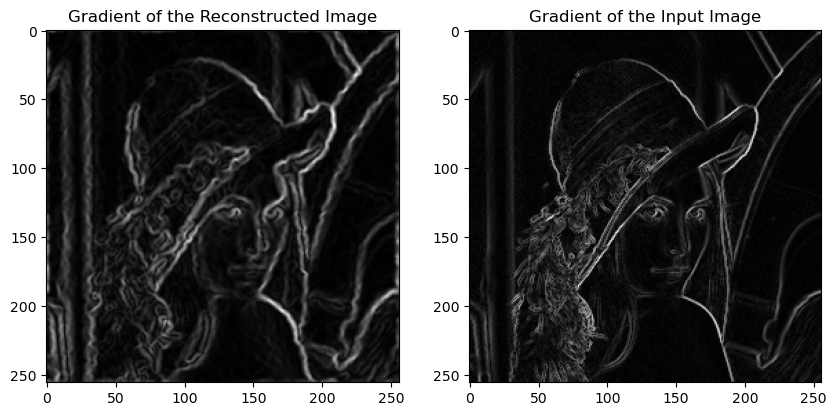

In [8]:
# Step 8: Take derivatives in the x and y directions (uncomment if needed)
delta_x = np.gradient(f_tilda, axis=1)
delta_y = np.gradient(f_tilda, axis=0)
delta = (  ( (delta_x)**(2) ) + ( ( (delta_y)**(2) )))**(1/2)

    # Just for the comparison sake I wrote these lines to find out the gradient of the input image
delta_xi = np.gradient(input_image, axis=1)
delta_yi = np.gradient(input_image, axis=0)
delta_i = (  ( (delta_xi)**(2) ) + ( ( (delta_yi)**(2) )))**(1/2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(delta, cmap='gray'), plt.title('Gradient of the Reconstructed Image')
plt.subplot(1, 2, 2), plt.imshow(delta_i, cmap='gray'), plt.title('Gradient of the Input Image')
plt.show()


# APPLYING A THRESHOLD ON THE GRADIENT

5.955853764067145


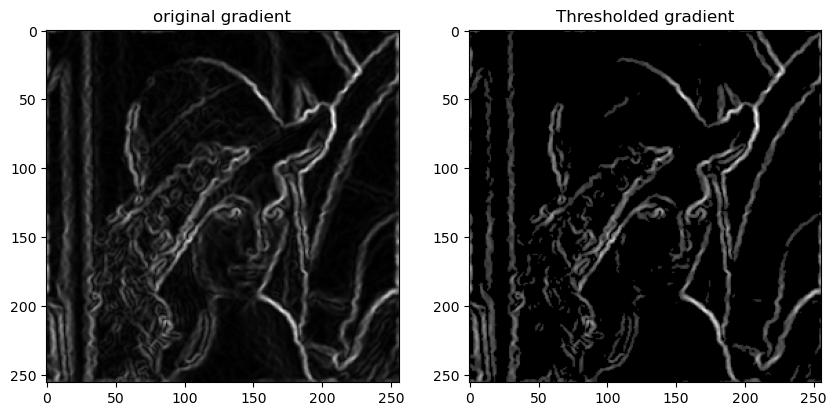

In [9]:
# Step 9: Thresholding the gradient 
m = np.mean (delta)
print (m)
thresh_grad = np.zeros((256,256))
for i in range (256):
    for j in range (256):
        if delta [i,j] >= 10:
            thresh_grad [i,j] = delta [i,j]
            
        else:
            thresh_grad [i,j] = 0
        
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2), plt.imshow(thresh_grad, cmap='gray'), plt.title('Thresholded gradient')
plt.subplot(1, 2, 1), plt.imshow(delta, cmap='gray'), plt.title('original gradient')
plt.show()
        
    

# GETTING A BINARY MATRIX CORRESPONDING TO THRESHOLDING

(<Axes: title={'center': 'Binary Image of Thresholded gradient'}>,
 Text(0.5, 1.0, 'Binary Image of Thresholded gradient'))

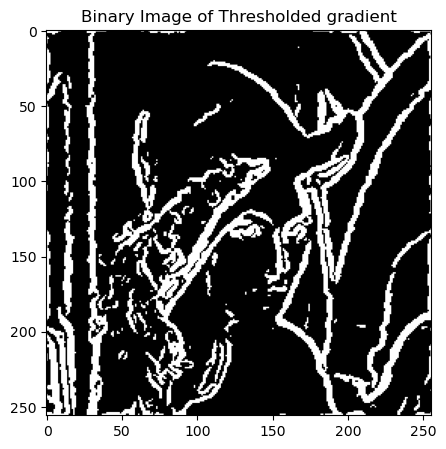

In [28]:
#Step 10: Extracting a binary matrix that has 1 at the significant locations.

binary_thresh_grad = np.zeros((256,256))
for i in range (256):
    for j in range (256):
        if thresh_grad[i,j] > 0 :
            binary_thresh_grad[i,j] = 1 
        else:
            binary_thresh_grad[i,j] = 0 
            

plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1), plt.imshow(binary_thresh_grad, cmap='gray'), plt.title('Binary Image of Thresholded gradient')

# CONVOLVING AT THE SIGNIFICANT LOCATIONS

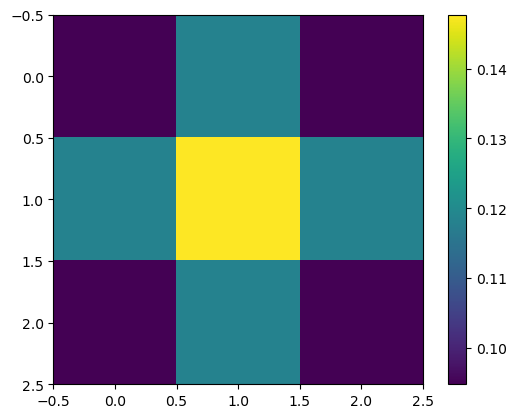

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Defining the filter

# Define the filter size (3x3)
filter_size = (3, 3)

# Define the standard deviation (sigma) for the Gaussian distribution
sigma = 1.5  # You can adjust this value as needed

# Create a grid of coordinates centered at (0, 0)
x, y = np.meshgrid(np.linspace(-1, 1, 3), np.linspace(-1, 1, 3))

# Compute the Gaussian filter values based on the 2D Gaussian formula
gaussian_filter_new = (1 / ((2 * np.pi)**0.5 * (sigma**2))) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

# Normalize the filter to ensure the sum of elements is 1
gaussian_filter_new /= np.sum(gaussian_filter_new)

# Print the Gaussian filter
#print("2D Gaussian Filter:")
#print(gaussian_filter_2d)

# Show the Gaussian filter with a color map
plt.imshow(gaussian_filter_new, cmap='viridis')  # You can choose a different colormap here
plt.colorbar()  # Add a colorbar to show the colormap
plt.show()



In [18]:

# Step 11: Flip the kernel to convolved again
flipped_filter = np.rot90(gaussian_filter_new, 2)

# Step 12: Zero pad the f_tilda, an image of 256x256, to become compatible with untruncated convolution.
zp_f_tilda = np.pad(f_tilda, ((5, 5), (5, 5)), mode='constant', constant_values=0)

# Step 13: Zero pad the binary_thresh_grad to match the size of the zero-padded f_tilda.

zp_binary_thresh = np.pad(binary_thresh_grad, ((5, 5), (5, 5)), mode='constant', constant_values=0)

# Step 14: Initialize a zero matrix of the same size as the zero-padded f_tilda and binary_thresh_grad.
final_image = np.zeros(zp_f_tilda.shape)

# Step 15: Convolve only at locations where binary_thresh_grad is 1, copy f_tilda where it is 0.
for i in range(5, 261):
    for j in range(5, 261):
        if zp_binary_thresh[i, j] == 1:
            # Get a window from zero-padded f_tilda centered at (i,j)
            window = zp_f_tilda[i - 1:i + 2, j - 1:j + 2]
            # Compute the dot product with the rotated filter
            dot_product = np.sum(window * flipped_filter)
            # Store the dot product in the output_image
            final_image[i, j] = dot_product
        else:
            # Copy the value of f_tilda to output_image
            final_image[i, j] = zp_f_tilda[i, j]          


# Now, output_image contains the result of convolution at significant locations and values from f_tilda at other locations.
output_image = final_image[5:261,5:261]

# FINAL OUTPUTS

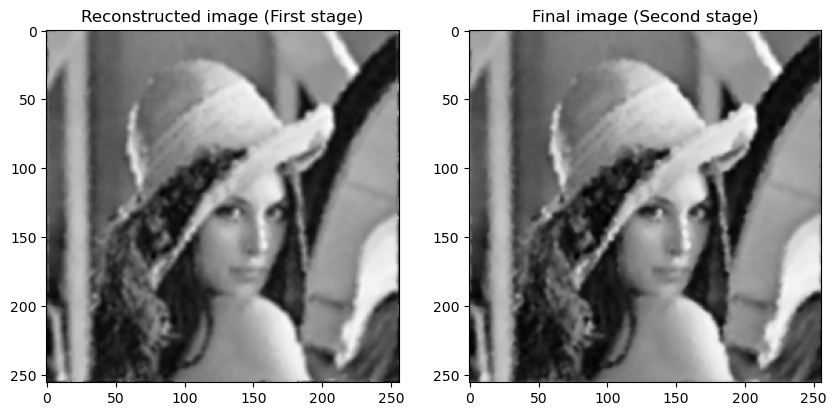

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(output_image, cmap='gray'), plt.title('Reconstructed image (First stage)')
plt.subplot(1, 2, 2), plt.imshow(f_tilda, cmap='gray'), plt.title('Final image (Second stage)')
plt.show()

# CALCULATING THE PSNR

In [21]:
from PIL import Image

# Convert images to NumPy arrays
input_array = np.array(input_image)
output_array = np.array(output_image)
stage1_array = np.array(f_tilda)

# Calculate the Mean Squared Error (MSE)
mse_1 = np.mean((input_array - stage1_array)**2)
mse_2 = np.mean((input_array - output_array) ** 2)

# Calculate the PSNR
max_pixel_value = 255  # Assuming the images are in the range [0, 255]
psnr_2 = 10 * np.log10((max_pixel_value ** 2) / mse_2)
psnr_1 = 10 * np.log10((max_pixel_value ** 2) / mse_1)

print(f'PSNR of the second stage: {psnr_1} dB')
print(f'PSNR of the first stage: {psnr_2} dB')


PSNR of the second stage: 24.256790646734828 dB
PSNR of the first stage: 23.916175907541216 dB


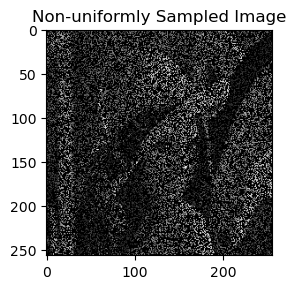

In [23]:
plt.subplot(1, 2, 2), plt.imshow(sampled_image, cmap='gray'), plt.title('Non-uniformly Sampled Image')
plt.show()